# Introduction

### What is regression?

 Regression is a process in which we determine the relation between two variables for example the relation between year and car sales, it might increase or decrease with year.

### What is linear regression? 
In linear regression the output is continuous and might have infinite possible outcomes.
                                          
                                          equation-y=mx+c



### What is logistic regression?
logistic regression has only two outcomes.The output is either 1 or 0, which shows occured or not.

                                          equation-y=e^x + e^-x

Here we shall see how to implement logistic regression to predict the digit based on data from MNIST dataset. It contains handwritten digits which are converted into pixels and the values with respect to each pixel is given to us, all these pixels are labelled.This dataset is divided into two parts test and train.

We shall predict the digit with respect to the pixels using logistic regression

The following steps are followed:  
  import our data  
  divide it into test and train  
  remove the predictor column  
  use train data to train the logistic regression model  
  use test data to validate the model


## Logistic regression using only one multinomial logistic regression function

### Import all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

### Load the dataset 

In [2]:
currentWd=os.getcwd()
#reading the data

train=os.path.join(currentWd,'mnist_train.csv')
test=os.path.join(currentWd,'mnist_test.csv')

In [3]:
train=np.loadtxt(train,delimiter=",")
test=np.loadtxt(test,delimiter=",")

### Divide the dataset into test and train

In [4]:
x_train=train[:,1:785]
x_test=test[:,1:785]
y_train=train[:,0]
y_test=test[:,0]



### Print MNIST numbers

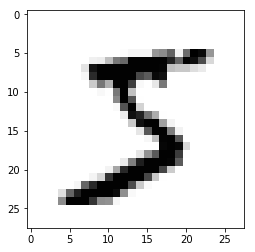

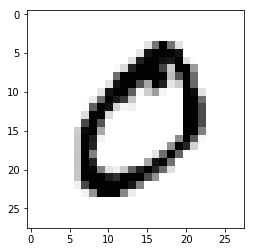

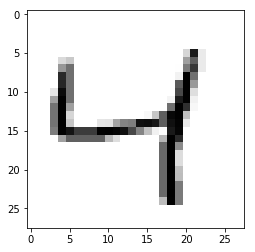

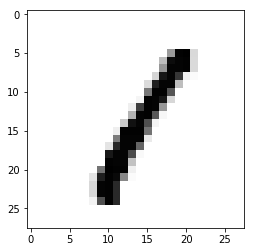

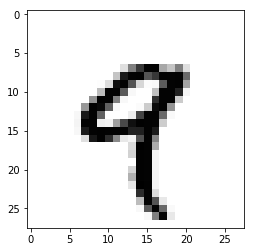

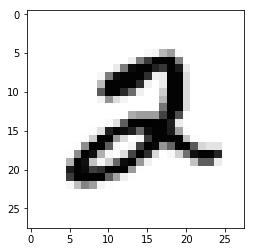

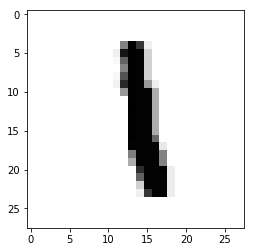

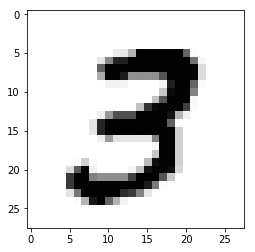

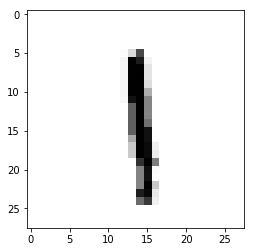

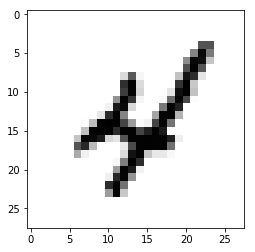

In [5]:
#Here we are printing the images from the train dataset
for i in range(10):
    image=x_train[i].reshape((28,28))
    plt.imshow(image,cmap="Greys")
    plt.show()

### Implementing the model

In [6]:
#implementing the model
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, y_train)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the values of x test using the model we we trianed before

In [7]:
preds = lr.predict(x_test)

### Confusion matrix

Here all the diagonal values represent the true values which are correct and the rest of them are false values, which the model predicted as a certain number.

In [8]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,preds)
cnf_matrix

array([[ 961,    0,    1,    3,    1,    3,    5,    4,    2,    0],
       [   0, 1113,    3,    3,    0,    1,    3,    2,   10,    0],
       [   4,   10,  927,   15,    6,    4,   13,    8,   42,    3],
       [   4,    1,   21,  914,    1,   24,    4,   10,   24,    7],
       [   1,    1,    7,    3,  907,    0,    9,    8,   10,   36],
       [  11,    2,    2,   35,   11,  774,   12,    6,   33,    6],
       [   9,    3,    8,    3,    8,   17,  907,    2,    1,    0],
       [   1,    6,   24,    7,    7,    1,    0,  950,    3,   29],
       [   8,    8,    7,   24,    6,   23,   10,   10,  869,    9],
       [   9,    7,    0,   11,   24,    6,    0,   22,    8,  922]])

### Plot the predicted values and verify with test label
Here we are ploting the predicted values with repect to their labels so we can identify which were true and false. 

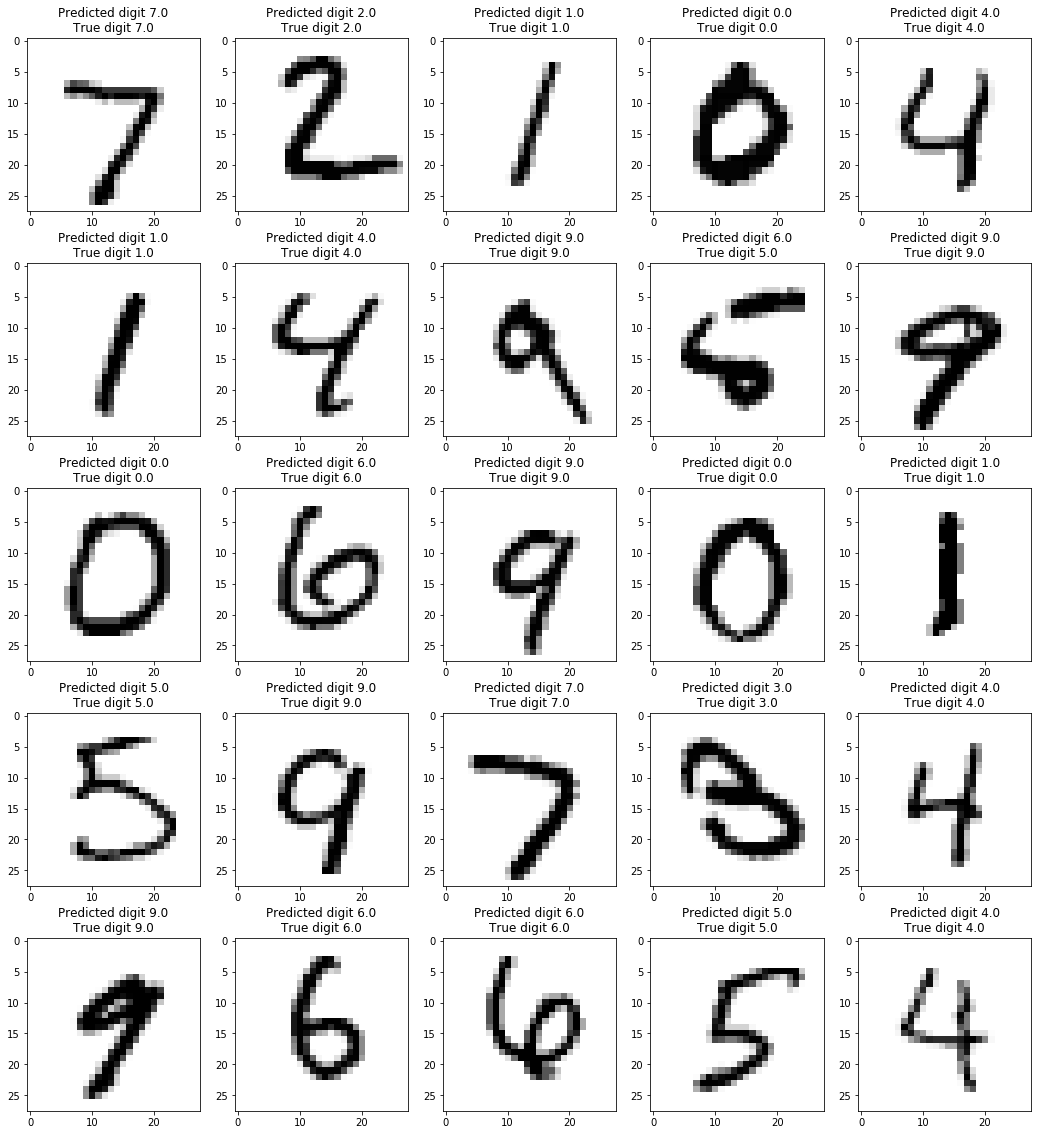

In [9]:
fig, axis = plt.subplots(5, 5, figsize=(18, 20))

for i, a in enumerate(axis.flat):
    a.imshow(x_test[i].reshape(28, 28), cmap='binary')
    a.set(title = "Predicted digit {0}\nTrue digit {1}".format(preds[i], y_test[i]))
    
    

### Building multiple models
Here we shall build multiple models, in our case we will be building 10 different models and validate our data on it.

In [10]:
#reading the dataset
mnist_train = pd.read_csv("/Users/sarankaja/downloads/MNIST-data/mnist_train.csv")
mnist_test=pd.read_csv("/Users/sarankaja/downloads/MNIST-data/mnist_test.csv")

In [11]:
mnist_train=mnist_train.rename ({'5':'label'},axis=1)
mnist_test=mnist_test.rename ({'7':'label'},axis=1)

### Changing the values for all the predictor variables  
Here we are changing the label values with respect to each number, where we are allocating one, if the number appeared and the rest as zero. With which we get 10 differnt y columns and we are using each one of them to train our model.

In [12]:
ytrain0=pd.DataFrame([1 if x==0 else 0 for x in mnist_train['label']])

ytrain1=pd.DataFrame([1 if x==1 else 0 for x in mnist_train['label']])

ytrain2=pd.DataFrame([1 if x==2 else 0 for x in mnist_train['label']])

ytrain3=pd.DataFrame([1 if x==3 else 0 for x in mnist_train['label']])

ytrain4=pd.DataFrame([1 if x==4 else 0 for x in mnist_train['label']])

ytrain5=pd.DataFrame([1 if x==5 else 0 for x in mnist_train['label']])

ytrain6=pd.DataFrame([1 if x==6 else 0 for x in mnist_train['label']])

ytrain7=pd.DataFrame([1 if x==7 else 0 for x in mnist_train['label']])

ytrain8=pd.DataFrame([1 if x==8 else 0 for x in mnist_train['label']])

ytrain9=pd.DataFrame([1 if x==9 else 0 for x in mnist_train['label']])

### Allocating test and train datasets

In [13]:
x_train=mnist_train.loc[:, mnist_train.columns != 'label']
y_train=mnist_train['label']

In [14]:
x_test=mnist_test.loc[:, mnist_test.columns != 'label']
y_test=mnist_test['label']

### Implementing logistic regression
Here we are implementing 10 different models using each number which ends up to be multinomial probabilistic regression.

we are predicting the probabilistic value on x test based on the model we trained above,and taking only probabilities curresponding to 1

we repeat the process for all the 10 numbers

In [15]:
#Lr for 0
#c is the regularization function, we are using ibfgs as it is a multinomial
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain0)

#we are predicting the probabilistic value on x test based on the model we trained above,and taking only probabilities curresponding to 1
preds0 = lr.predict_proba(x_test)[:, 1]
score0=lr.score(x_test,y_test)

In [16]:
#Lr for 1
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain1)
preds1 = lr.predict_proba(x_test)[:, 1]
score1=lr.score(x_test,y_test)

In [17]:
#Lr for 2
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain2)
preds2 = lr.predict_proba(x_test)[:, 1]
score2=lr.score(x_test,y_test)

In [18]:
#Lr for 3
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain3)
preds3 = lr.predict_proba(x_test)[:, 1]
score3=lr.score(x_test,y_test)

In [19]:
#Lr for 4
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain4)
preds4 = lr.predict_proba(x_test)[:, 1]
score4=lr.score(x_test,y_test)

In [20]:
#Lr for 5
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain5)
preds5 = lr.predict_proba(x_test)[:, 1]
score5=lr.score(x_test,y_test)

In [21]:
#Lr for 6
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain6)
preds6 = lr.predict_proba(x_test)[:, 1]
score6=lr.score(x_test,y_test)

In [22]:
#Lr for 7
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain7)
preds7 = lr.predict_proba(x_test)[:, 1]
score7=lr.score(x_test,y_test)

In [23]:
#Lr for 8
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain8)
preds8 = lr.predict_proba(x_test)[:, 1]
score8=lr.score(x_test,y_test)

In [24]:
#Lr for 9
lr = LogisticRegression(C=20, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, ytrain9)
preds9 = lr.predict_proba(x_test)[:, 1]
score9=lr.score(x_test,y_test)

### We are assigning all the probabilities we predicted with respect to their column names and converting it into a dataframe

In [25]:
predicted = pd.DataFrame({'0': preds0,'1': preds1,'2': preds2,'3': preds3, '4': preds4,'5': preds5, '6': preds6,'7': preds7, '8': preds8, '9': preds9})            
                   

### We are now using the softmax function to convert/normalize all the probabilities which we obtianed before, after applying this all the probabilites would fall between 0 to 1 and sum of all the probabilities will be 1

In [26]:
import numpy as np

# your solution:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [27]:
#print(softmax(predicted))
a=(softmax(predicted))
print(a)

             0         1         2         3         4         5         6  \
0     0.000086  0.000084  0.000234  0.000086  0.000086  0.000092  0.000087   
1     0.000086  0.000226  0.000089  0.000087  0.000086  0.000089  0.000089   
2     0.000232  0.000084  0.000086  0.000086  0.000086  0.000088  0.000087   
3     0.000086  0.000084  0.000087  0.000086  0.000228  0.000088  0.000087   
4     0.000086  0.000227  0.000087  0.000087  0.000086  0.000088  0.000086   
5     0.000086  0.000084  0.000086  0.000086  0.000229  0.000102  0.000086   
6     0.000086  0.000168  0.000086  0.000086  0.000087  0.000095  0.000086   
7     0.000086  0.000084  0.000086  0.000086  0.000088  0.000089  0.000175   
8     0.000086  0.000084  0.000086  0.000086  0.000087  0.000088  0.000086   
9     0.000230  0.000084  0.000087  0.000086  0.000086  0.000089  0.000086   
10    0.000086  0.000084  0.000086  0.000086  0.000086  0.000088  0.000152   
11    0.000086  0.000084  0.000086  0.000086  0.000087  0.000088

### We are using the max function to find out the maximum value in each row and get its corresponding column name, as the value corresponding to the highest probability, will be the predicted output of that row.

In [28]:
ab=a.idxmax(axis=1)
   

In [29]:
#converting it into integer type to find confusion matrix
ab=ab.values.astype(int)

    

### Confusion matrix
All the diagonal numbers constitute to the true positives and rest all are false negatives.All the diagonal elements are the numbers which are present and are predicted correctly, rest all were predicted wrong.

In [30]:
cnf_matrix = metrics.confusion_matrix(y_test,ab)
cnf_matrix

array([[ 956,    0,    1,    2,    1,    6,    6,    1,    5,    2],
       [   0, 1112,    4,    1,    0,    1,    5,    1,   10,    1],
       [   8,   11,  906,   16,    9,    9,    9,   10,   51,    3],
       [   4,    0,   16,  911,    1,   33,    4,   11,   21,    9],
       [   1,    2,    4,    3,  908,    3,    9,    2,   10,   40],
       [   9,    2,    1,   34,    9,  770,   14,    6,   38,    9],
       [   7,    3,    7,    1,    4,   20,  908,    1,    7,    0],
       [   2,    6,   24,    4,    8,    1,    1,  942,    4,   35],
       [   7,   11,    6,   21,   11,   38,    7,   10,  852,   11],
       [   6,    6,    2,   11,   30,   11,    0,   25,   15,  903]])

### Accuracy score
This tells us how well our model predicted

In [31]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,ab)

In [32]:
score

0.916891689168917

### Conclusion

We completed running and predicting the outcome digits with respect to each image with the help of multinomial probabilistic logistic regression, which yielded an accuracy score of 91.6%.